In [1]:
#AIM
#Pred turbidity with sensor data (42755 points)
#pred cellcount with tubidity (~100 points)
#get rid of TSS


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import json
import os
import datetime as dt

from pandas.plotting import lag_plot
import matplotlib.dates as mdates

import xlrd

In [3]:
sensor_path = os.path.join("data", "data-withdate-missingvals.csv")
sensor_df = pd.read_csv(sensor_path)

In [4]:
features = ['pH', 'Temperature', 'D.O. (mg/L)', 'Turbidity (NTU)', 'TSS (g/L)', 'NO3-N (mg/L)', 'NH4-N (mg/L)', 'ORP (MV)', 'Conductivity (mS/cm)']

In [5]:

sensor_df = sensor_df.drop(columns=["TSS (g/L)"])

In [6]:
#convert to date
sensor_df = sensor_df.rename(columns={'S01': 'Date'})
def py_date(x):
    """Converts Excel dates to python datetime"""
    date_tuple = xlrd.xldate_as_tuple(x,0)
    return dt.datetime(*date_tuple)

sensor_df['Date'] = sensor_df['Date'].transform(py_date)



In [21]:
#only need upper limit as 3 std below mean is negative which is not possible
upper_limit = 200 + 20
lower_limit = 20
sensor_df = sensor_df[~(sensor_df["Turbidity (NTU)"] > upper_limit)]
sensor_df = sensor_df[~(sensor_df["Turbidity (NTU)"] < lower_limit)]

In [22]:
cleaned_df = sensor_df.dropna(how='any',axis=0) 

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43904 entries, 0 to 50722
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  43904 non-null  datetime64[ns]
 1   pH                    43904 non-null  float64       
 2   Temperature (°C)      43904 non-null  float64       
 3   D.O. (mg/L)           43904 non-null  float64       
 4   Turbidity (NTU)       43904 non-null  float64       
 5   NO3-N (mg/L)          43904 non-null  float64       
 6   NH4-N (mg/L)          43904 non-null  float64       
 7   ORP (MV)              43904 non-null  float64       
 8   Conductivity (mS/cm)  43904 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.3 MB


In [24]:
cleaned_df["Turbidity (NTU)"].max()
cleaned_df["Turbidity (NTU)"].min()

20.013

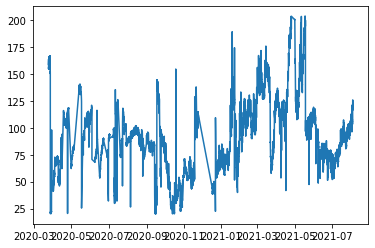

In [20]:
plt.plot(cleaned_df["Date"], cleaned_df["Turbidity (NTU)"])

In [25]:
output_datafile = os.path.join("data", "final_df_big.csv")
cleaned_df.to_csv(output_datafile, index=False)